<a href="https://colab.research.google.com/github/OleKrarup123/PythonTutorials/blob/main/Riemann/RiemannSum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTE: If you ever need to use python to compute numerical integrals, please do not use the code presented here. Use [np.trapz](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html#r7aa6c77779c0-2) instead! [Numpy](https://numpy.org/) functions are fundamentally written in the C-programming language, which makes them computationally much faster than anything written from scratch in python. 

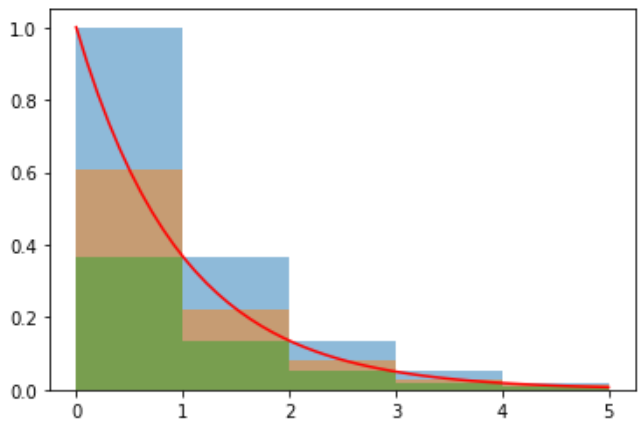

## Riemann sums
If you have a function, $f(x)$ and want to find the approximate area under its graph in a certain interval, you can use a Riemann sum:
$$S_N= ∑_{i=1}^{N} f(x_i)\Delta x  $$

First, divide the interval, $[x_{min},x_{max}]$ into segments of length $\Delta x = \frac{x_{max}-x_{min}}{N}$. Next, construct the set of points, $\{x_i\}$, according to one of the rules explained below. Then, evaluate the fuction at these points, add up the results and multiply it by $\Delta x$.



## Import useful libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Function for dividing interval, [$x_{min}$,$x_{max}$], into $N$ segments according to "left", "mid" or "right" rule.

In [ ]:
#https://en.wikipedia.org/wiki/Riemann_sum#Riemann_summation_methods

def getXrange(xmin,xmax,N,mode):
    dx=(xmax-xmin)/N #Distance between points

    x=np.linspace(xmin,xmax-dx,N) #Range of points for mode='left'

    if mode.lower() == 'left': #If mode == left, do nothing
        x=x                       

    elif mode.lower() == 'mid': #If mode == mid, shift x-valued by dx/2
        x+=dx/2.0


    elif mode.lower() == 'right': #If mode == right, shift x-valued by dx
        x+=dx
    
    else: #default assumes 'left'
      x=x    
        
    return x

## Test xrange function

In [ ]:
xmin, xmax = 1 , 5
N=4

x_left = getXrange(xmin,xmax,N,'left')
x_mid   = getXrange(xmin,xmax,N,'mid')
x_right = getXrange(xmin,xmax,N,'right')
dx=x_left[1]-x_left[0]

print('left:',x_left)
print('mid:',x_mid)
print('right:',x_right)


def plotArrows(x,y,arrowColor,mode):
  dx = x[1]-x[0]
  dy = y[1]-y[0]

  for x_val,y_val in zip(x,y):
    plt.arrow(x_val-dx, y_val, dx, dy,width=.08,color=arrowColor, length_includes_head=True) 

plt.figure()
plt.vlines(x_left,0,1,'C0',label = 'left')
plotArrows(x_left+dx,0.5*np.ones_like(x_left),'C0','left')

plt.vlines(x_mid,-1,0,'C1',label = 'mid')
plotArrows(x_mid+dx/2,-0.5*np.ones_like(x_right),'C1','mid')

plt.vlines(x_right,-2,-1,'C2',label = 'right')
plotArrows(x_right,-1.5*np.ones_like(x_right),'C2','right')
plt.legend(bbox_to_anchor=(1.25,1.0))
plt.show()



## Visualize Riemann sum

In [ ]:
def myFunc(x):
    return np.exp(-x)

def myFunc_integral(xmin,xmax):
  return np.exp(-xmin)-np.exp(-xmax)

In [ ]:
#Sum parameters
N=50
xmin=0.0
xmax=5

#Finely spaced x-values
xplot=np.linspace(xmin,xmax,np.max(N)*10)

#Get x-ranges
x_left_test  = getXrange( xmin,xmax,N, 'left' )
x_mid_test  = getXrange( xmin,xmax,N, 'mid' )
x_right_test = getXrange( xmin,xmax,N, 'right' )

#Compute step size
dx = x_left_test[1]-x_left_test[0]
print(f'dx = {dx}')
#Plot Riemann sum visualization
plt.figure()
plt.plot(xplot,myFunc(xplot),'r-',label='myFunc')

plt.bar(x_left_test+dx/2 , myFunc(x_left_test) ,dx,alpha=0.5,label='left')
plt.bar(x_mid_test       , myFunc(x_mid_test)  ,dx,alpha=0.5,label='mid')
plt.bar(x_right_test-dx/2, myFunc(x_right_test),dx,alpha=0.5,label='right')

plt.legend(bbox_to_anchor=(1.25,1.0))
plt.show()

## Define function for taking Riemann sum

$$S_N= ∑_{i=1}^{N} f(x_i)\Delta x  $$

In [ ]:
def riemannSum( f,xmin,xmax,N, mode ):
    
    x = getXrange(xmin,xmax,N,mode)

    return (x[1]-x[0])*np.sum(f(x))

## Test function for taking Riemann sum

In [ ]:
#Create range of integers
intlist = np.arange(1,10,1)
Nvals= 2**intlist #Number of intervals: [1,2,4,8,16,...] 

#Arrays for storing result
results_left=np.zeros_like(Nvals)*1.0
results_mid=np.zeros_like(Nvals)*1.0
results_right=np.zeros_like(Nvals)*1.0



#Compute the Riemann sum for each number of divisions and store result
for idx, n in enumerate(Nvals):
    R_left   = riemannSum( myFunc,xmin,xmax,n, 'left' )
    R_mid    = riemannSum( myFunc,xmin,xmax,n, 'mid' )
    R_right  = riemannSum( myFunc,xmin,xmax,n, 'right' )
    
    results_left[idx]  = R_left
    results_mid[idx]   = R_mid
    results_right[idx] = R_right
    

#Compute actual result of integral of myFunc
trueIntegral = myFunc_integral(xmin,xmax)

#Plot error
plt.figure()
plt.title('Riemann error')
plt.plot(Nvals,np.abs(results_left-trueIntegral),'C0-',label='Left')
plt.plot(Nvals,np.abs(results_mid-trueIntegral),'C1-',label='Mid')
plt.plot(Nvals,np.abs(results_right-trueIntegral),'C2-',label='Right')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of subdivisions')
plt.ylabel('Absolute error')
plt.grid()
plt.legend()
plt.show()


#Plot error
plt.figure()
plt.title('Riemann error')
plt.plot(Nvals,np.abs(results_left-trueIntegral)/trueIntegral*100,'C0-',label='Left')
plt.plot(Nvals,np.abs(results_mid-trueIntegral)/trueIntegral*100,'C1-',label='Mid')
plt.plot(Nvals,np.abs(results_right-trueIntegral)/trueIntegral*100,'C2-',label='Right')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of subdivisions')
plt.ylabel('Relative error [%]')
plt.grid()
plt.legend()
plt.show()

We expect "left" and "right" to scale as $\frac{1}{N}$, while "mid" should scale as $\frac{1}{N^2}$